<a href="https://colab.research.google.com/github/RodrigoPretes/AnalyzesOfGraph/blob/main/ProvaIA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Questão 4 -**

A busca euristica pega um valor anteriormente definido para determinar a tomada de decisões, no caso abaixo utiliziei a distancia em linha reta entre as capitais. O algoritmo a* utiliza essa euristica e tem a possibilidade de retornar

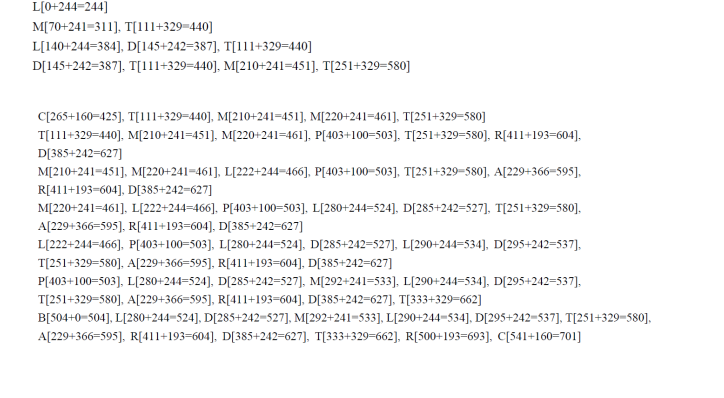

## Questão 3 ##

In [1]:
!pip install numpy
!pip install matplotlib
!pip install tensorflow
!pip install scikeras
import tensorflow as tf
print(tf.__version__)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree # Adicionei a importação correta para
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2.14.0


In [2]:
# Entrada de dados
X = np.array(
 [
 ['Verde', 'Não', '10'],
 ['Verde', 'Sim', '50'],
 ['Verde', 'Sim', '58'],
 ['Vermelho', 'Sim', '60'],
 ['Vermelho', 'Não', '70'],
 ['Amarelo', 'Não', '80'],
 ['Amarelo', 'Sim', '30'],
 ['Amarelo', 'Não','10']
 ]
)
Y = np.array( [ 'Andar', 'Andar', 'Parar', 'Parar',
'Parar', 'Virar à esquerda', 'Virar à direita', 'Virar à esquerda'] )
X1 = pd.DataFrame(X, dtype=str, columns=['Semáforo',
'Luz de freio', 'Distância do carro frente'])
XX = pd.get_dummies(data=X1, columns=['Semáforo',
'Luz de freio', 'Distância do carro frente'])
XX
Y1 = pd.DataFrame(Y, dtype=str, columns=['Ação'])
YY = pd.get_dummies(data=Y1, columns=['Ação'])
YY

,Ação_Andar,Ação_Parar,Ação_Virar à direita,Ação_Virar à esquerda
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,0,0,1
6,0,0,1,0
7,0,0,0,1


In [3]:
# Criando o classificador
arvore = DecisionTreeClassifier(criterion='entropy',
max_depth=2)

In [4]:
# Criando a árvore
arvore = arvore.fit(XX, YY)
arvore.feature_importances_
arvore.classes_
arvore.score(XX, YY)

0.875

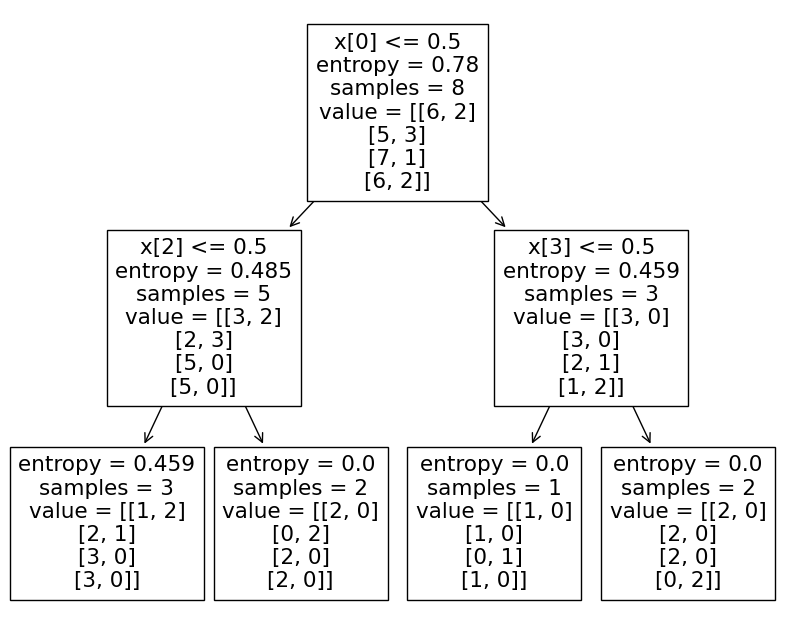

[Text(0.5, 0.8333333333333334, 'Semáforo_Amarelo <= 0.5\nentropy = 0.78\nsamples = 8\nvalue = [[6, 2]\n[5, 3]\n[7, 1]\n[6, 2]]'),
 Text(0.25, 0.5, 'Semáforo_Vermelho <= 0.5\nentropy = 0.485\nsamples = 5\nvalue = [[3, 2]\n[2, 3]\n[5, 0]\n[5, 0]]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.459\nsamples = 3\nvalue = [[1, 2]\n[2, 1]\n[3, 0]\n[3, 0]]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 2\nvalue = [[2, 0]\n[0, 2]\n[2, 0]\n[2, 0]]'),
 Text(0.75, 0.5, 'Luz de freio_Não <= 0.5\nentropy = 0.459\nsamples = 3\nvalue = [[3, 0]\n[3, 0]\n[2, 1]\n[1, 2]]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [[1, 0]\n[1, 0]\n[0, 1]\n[1, 0]]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 2\nvalue = [[2, 0]\n[2, 0]\n[2, 0]\n[0, 2]]')]

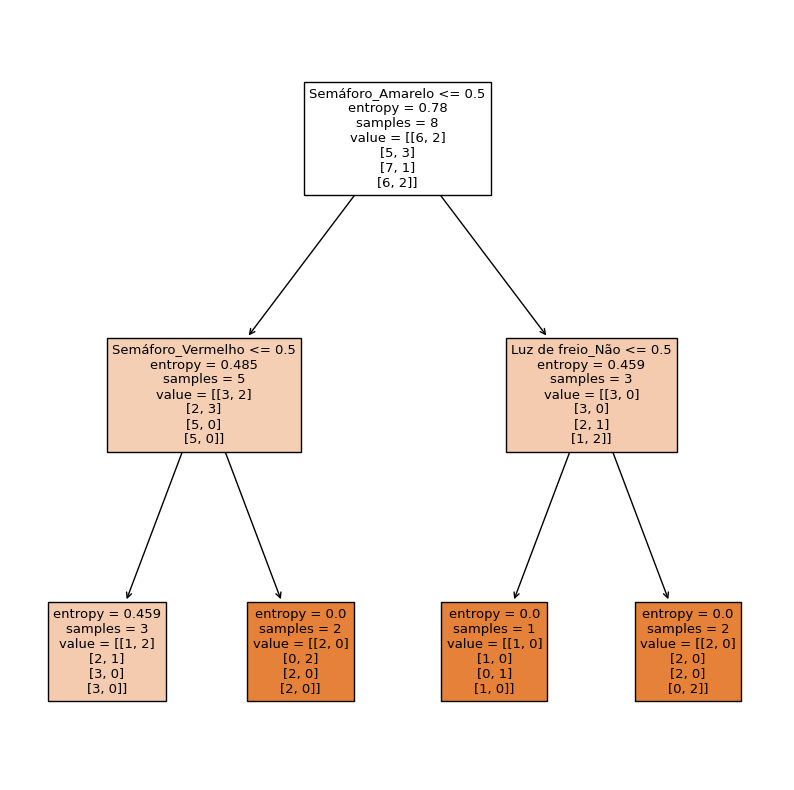

In [5]:
# Visualizando essa árvore
from sklearn import tree
fig, ax = plt.subplots(figsize=(10,8))
tree.plot_tree(arvore)
plt.show()
# Visualizando essa árvore 2
figura, eixos = plt.subplots(nrows=1, ncols=1,
figsize=(10,10))
tree.plot_tree(arvore, feature_names=XX.columns,
class_names = ['Não', 'Sim'], filled=True)

In [6]:
# Regra Se- Então
from sklearn.tree import export_text
XX.columns
r = export_text(arvore, feature_names=['Semáforo_Verde',
'Semáforo_Vermelho','Semáforo_Amarelo', 'Luz de freio_Não', 'Luz de freio_sim',
'Distância do carro frente_10','Distância do carro frente_50','Distância do carro frente_58','Distância do carro frente_60','Distância do carro frente_70','Distância do carro frente_80','Distância do carro frente_30'])
print(r)

|--- Semáforo_Verde <= 0.50
|   |--- Semáforo_Amarelo <= 0.50
|   |   |--- class: 2
|   |--- Semáforo_Amarelo >  0.50
|   |   |--- class: 0
|--- Semáforo_Verde >  0.50
|   |--- Luz de freio_Não <= 0.50
|   |   |--- class: 0
|   |--- Luz de freio_Não >  0.50
|   |   |--- class: 0



## Questão 2 ##

In [8]:

# Instala a biblioteca
!pip install numpy
!pip install matplotlib
!pip install tensorflow
!pip install scikeras

In [9]:
import tensorflow as tf
print(tf.__version__)


from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2.14.0


In [10]:
# Entrada de dados
X = np.array(
 [
  ['20', 'H', 'C'],
  ['25', 'R', 'B'],
  ['28', 'R', 'C'],
  ['23', 'H', 'B'],
  ['19', 'J', 'B'],
  ['35', 'R', 'C'],
  ['30', 'J', 'C'],
  ['38', 'J', 'B'],
  ['40', 'H', 'C'],
  ['24', 'J', 'C'],
  ['29', 'R', 'C'],
  ['20', 'J', 'B'],
  ['19', 'R', 'C']
 ]
)
Y = np.array( [ '+', '+', '+', '+', '+', '-',  '-',  '-',  '+', '-',  '-',  '+',  '-', ] )

In [11]:
X1 = pd.DataFrame(X, dtype=str, columns=['Idade', 'Exame A', 'Exame B'])
XX = pd.get_dummies(data=X1, columns=['Idade', 'Exame A', 'Exame B'])
XX

Y1 = pd.DataFrame(Y, dtype=str, columns=['Classe'])
YY = pd.get_dummies(data=Y1, columns=['Classe'])
YY


,Classe_+,Classe_-
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,1
6,0,1
7,0,1
8,1,0
9,0,1


In [12]:
# Criando o classificador
arvore = DecisionTreeClassifier(criterion='entropy', max_depth=2)



# Criando a árvore
arvore = arvore.fit(XX, YY)
arvore.feature_importances_

arvore.classes_

arvore.score(XX, YY)

0.8461538461538461

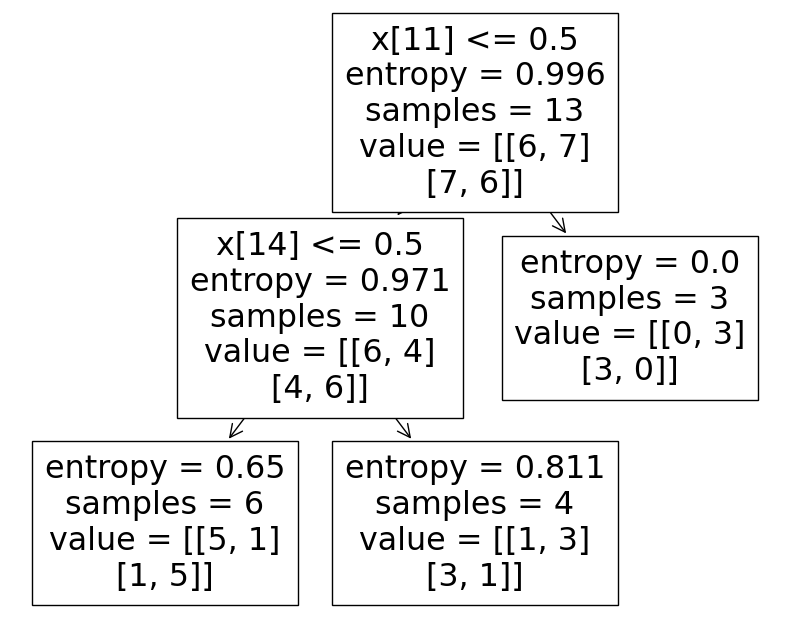

In [13]:
# Visualizando essa árvore
from sklearn import tree
fig, ax = plt.subplots(figsize=(10,8))
tree.plot_tree(arvore)
plt.show()

[Text(0.6, 0.8333333333333334, 'Exame A_H <= 0.5\nentropy = 0.996\nsamples = 13\nvalue = [[6, 7]\n[7, 6]]'),
 Text(0.4, 0.5, 'Exame B_B <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [[6, 4]\n[4, 6]]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.65\nsamples = 6\nvalue = [[5, 1]\n[1, 5]]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.811\nsamples = 4\nvalue = [[1, 3]\n[3, 1]]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [[0, 3]\n[3, 0]]')]

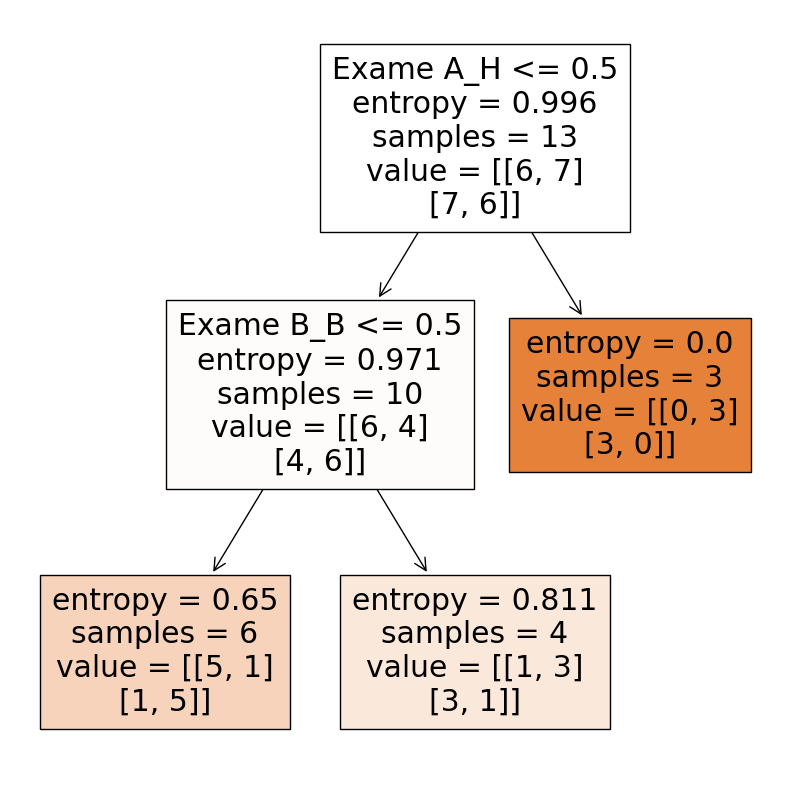

In [14]:
# Visualizando essa árvore 2
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore, feature_names=XX.columns, class_names = ['Positivo', 'Negativo'], filled=True)

In [15]:
# Regra Se- Então
from sklearn.tree import export_text
XX.columns

Index(['Idade_19', 'Idade_20', 'Idade_23', 'Idade_24', 'Idade_25', 'Idade_28',
       'Idade_29', 'Idade_30', 'Idade_35', 'Idade_38', 'Idade_40', 'Exame A_H',
       'Exame A_J', 'Exame A_R', 'Exame B_B', 'Exame B_C'],
      dtype='object')

In [16]:
r = export_text(arvore, feature_names=['Idade_19', 'Idade_20', 'Idade_23', 'Idade_24', 'Idade_25', 'Idade_28',
       'Idade_29', 'Idade_30', 'Idade_35', 'Idade_38', 'Idade_40', 'Exame A_H',
       'Exame A_J', 'Exame A_R', 'Exame B_B', 'Exame B_C'])
print(r)

|--- Exame A_H <= 0.50
|   |--- Exame B_B <= 0.50
|   |   |--- class: 0
|   |--- Exame B_B >  0.50
|   |   |--- class: 1
|--- Exame A_H >  0.50
|   |--- class: 1



## questao 5 ##

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [18]:
# Função para calcular a pertinência ao conjunto fuzzy de pessoas jovens
def jovem(x):
    return tf.where((x >= 0) & (x <= 40), ((40 - x) / 40)**2, 0.0)

In [19]:
# Função para calcular a pertinência ao conjunto fuzzy de pessoas idosas
def idoso(x):
    return tf.where((x >= 40) & (x <= 120), ((x - 40) / 80)**2, 0.0)

In [20]:
# Conjunto universo
universo = np.linspace(0, 120, 1000)
universo_tensor = tf.constant(universo, dtype=tf.float32)

In [21]:
# Pertinência aos conjuntos fuzzy
jovem_pertinencia = jovem(universo_tensor)
idoso_pertinencia = idoso(universo_tensor)

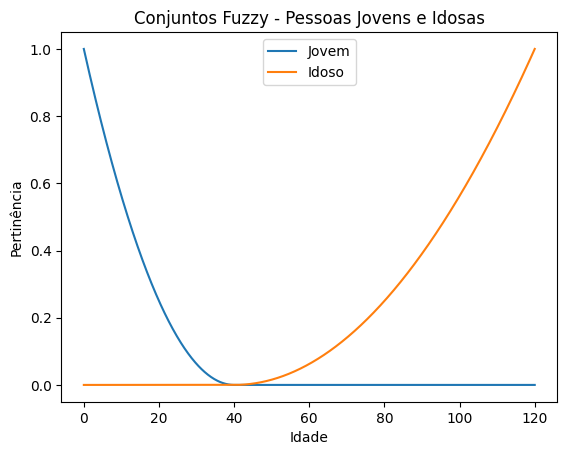

In [22]:

# Plotagem dos conjuntos fuzzy
plt.plot(universo, jovem_pertinencia.numpy(), label='Jovem')
plt.plot(universo, idoso_pertinencia.numpy(), label='Idoso')
plt.title('Conjuntos Fuzzy - Pessoas Jovens e Idosas')
plt.xlabel('Idade')
plt.ylabel('Pertinência')
plt.legend()
plt.show()

In [23]:
# Pergunta b) Uma pessoa com 40 anos é jovem ou idosa?
idade_pessoa = 40
pertinencia_jovem = jovem(tf.constant(idade_pessoa, dtype=tf.float32)).numpy()
pertinencia_idoso = idoso(tf.constant(idade_pessoa, dtype=tf.float32)).numpy()
print(f'Pertinência Jovem: {pertinencia_jovem}, Pertinência Idoso: {pertinencia_idoso}')

Pertinência Jovem: 0.0, Pertinência Idoso: 0.0


In [24]:
# Pergunta c) Complementar fuzzy das pessoas jovens
def nao_jovem(x):
    return 1.0 - jovem(x)

In [25]:
# Pergunta d) Interseção fuzzy das pessoas idosas e não jovens
intersecao_fuzzy = tf.minimum(idoso(universo_tensor), nao_jovem(universo_tensor))

In [26]:
# Pergunta e) União fuzzy das pessoas jovens e idosas
uniao_fuzzy = tf.maximum(jovem(universo_tensor), idoso(universo_tensor))

In [27]:
# União fuzzy das pessoas não jovens e não idosas
uniao_nao_jovem_nao_idoso = tf.maximum(nao_jovem(universo_tensor), 1.0 - idoso(universo_tensor))

In [28]:
# Pergunta f) Nível 0.8 do conjunto fuzzy dos idosos
limiar = 0.8
idade_nivel_08_idoso = tf.where(idoso(universo_tensor) >= limiar)
print(f'Nível 0.8 do conjunto fuzzy dos idosos: {idade_nivel_08_idoso.numpy()}')

Nível 0.8 do conjunto fuzzy dos idosos: [[929]
 [930]
 [931]
 [932]
 [933]
 [934]
 [935]
 [936]
 [937]
 [938]
 [939]
 [940]
 [941]
 [942]
 [943]
 [944]
 [945]
 [946]
 [947]
 [948]
 [949]
 [950]
 [951]
 [952]
 [953]
 [954]
 [955]
 [956]
 [957]
 [958]
 [959]
 [960]
 [961]
 [962]
 [963]
 [964]
 [965]
 [966]
 [967]
 [968]
 [969]
 [970]
 [971]
 [972]
 [973]
 [974]
 [975]
 [976]
 [977]
 [978]
 [979]
 [980]
 [981]
 [982]
 [983]
 [984]
 [985]
 [986]
 [987]
 [988]
 [989]
 [990]
 [991]
 [992]
 [993]
 [994]
 [995]
 [996]
 [997]
 [998]
 [999]]


## QUESTAO 1##

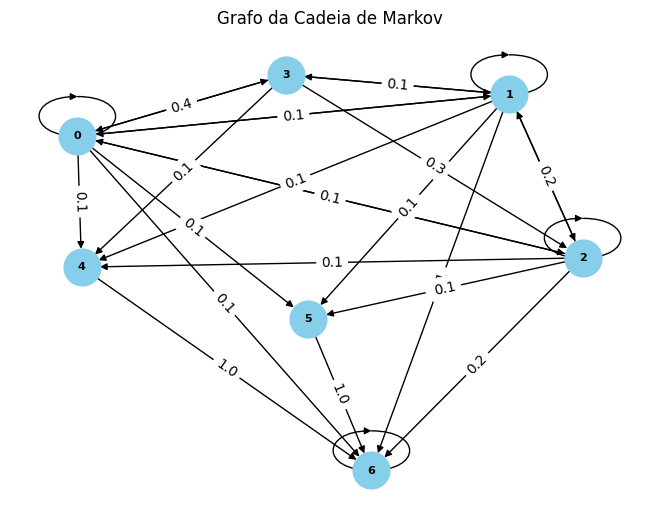

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

# Matriz de probabilidade de transição
P = [
    [0.3, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.1, 0.4, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.1, 0.2, 0.3, 0.0, 0.1, 0.1, 0.2],
    [0.4, 0.1, 0.3, 0.0, 0.1, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Estado 6 absorvente
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Estado 6 absorvente
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Estado 6 absorvente
]

# Construir o grafo da cadeia de Markov
G = nx.DiGraph()
for i in range(len(P)):
    for j in range(len(P[i])):
        if P[i][j] > 0:
            G.add_edge(i, j, weight=P[i][j])

# Visualizar o grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', arrowsize=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Grafo da Cadeia de Markov')
plt.show()